In [1]:
import tensorflow as tf

In [3]:
# creating a node 
hello = tf.constant("hello , tensor")
# creating object
sess = tf.Session()

print(sess.run(hello))

b'hello , tensor'


In [5]:
# basic operation

# in normal python we write a = 2
# but in tensorflow

a = tf.constant(2)
b = tf.constant(3)

with tf.Session() as sess:
  print("addition of number ", sess.run(a+b))
  print("multiplication of number ", sess.run(a*b))

addition of number  5
multiplication of number  6


In [8]:
# but while using function we have to create placeholder which does define the data type
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

add = tf.add(x,y)
multi = tf.multiply(x,y)

# Launch the default graph.
with tf.Session() as sess:
  print("Addition of number : ", sess.run(add , feed_dict={x:2,y:3}))
  print("Multiply of number : ", sess.run(multi , feed_dict={x:2,y:3}))


Addition of number :  5
Multiply of number :  6


In [14]:
# matrix multiplication

#1x2
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[12.]]


#### *_Let's dive into linear regression_*


 

In [0]:
# import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# just use to make graph looks nicer
%config InlineBackend.figure_format = 'svg'

**linear regression using tensorflow**

In [0]:
# y = f(x)
# we have set of input and set of output based on input dataset
# what we have to find out is f(x) which will be the relation between x and y (i.e input and output)



we need to learn the relationship between them that is called a **hypothesis.**

In case of Linear regression, the hypothesis is a straight line, i.e,
 **h(x) = wx + b**
Where w is a vector called **Weights** and b is a scalar called **Bias**. The Weights and Bias are called the parameters of the model.

All we need to do is estimate the value of **w** and **b** from the given set of data such that the resultant hypothesis produces the **least cost J** which is defined by the following **cost function**
  
 image.png



where m is the number of data points in the given dataset. This cost function is also called Mean Squared Error.

In [0]:
# let's start coding

learning_rate = 0.01
epochs = 200

n_sample= 30

In [0]:
# now take a random points

train_x = np.linspace(0,20,n_sample)
# y = mx + c + noise
train_y = 3*train_x + 4*np.random.randn(n_sample)


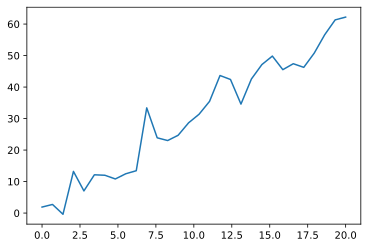

In [23]:
# let's plot a graph
plt.plot(train_x, train_y)
plt.show()


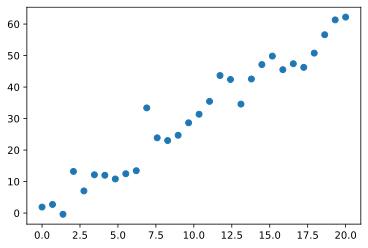

In [24]:
# Hmmm i don't like lines
# lets make points

plt.plot(train_x, train_y , 'o')
plt.show()


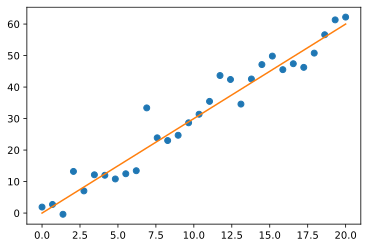

In [26]:
# bit nicer

# lets check difference between lines 
# with noise and without noise
plt.plot(train_x, train_y , 'o')
plt.plot(train_x, 3*train_x)

plt.show()



In [31]:
# define variable 

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# only written single value
w = tf.Variable(np.random.randn() , name = 'weight')
b = tf.Variable(np.random.randn() , name = 'bias')
print(b.value())

Tensor("bias_4/read:0", shape=(), dtype=float32)


In [0]:
  # pred = x*w + b
  prediction = tf.add(tf.multiply(X, w) ,b)

In [0]:
# to minimize the cost
cost = tf.reduce_sum((prediction-Y)**2 / (2*n_sample))

In [0]:
# define optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
# initalize all are parameters
init = tf.global_variables_initializer()

cost:54.30986404418945 w:2.182626247406006 b:0.5245328545570374
cost:8.714800834655762 w:2.99739408493042 b:0.586540699005127
cost:8.714640617370605 w:2.9978182315826416 b:0.5799477100372314
cost:8.714499473571777 w:2.9982216358184814 b:0.5736895799636841
cost:8.714378356933594 w:2.9986038208007812 b:0.5677502751350403
cost:8.71426773071289 w:2.998966693878174 b:0.5621128678321838
cost:8.714173316955566 w:2.9993114471435547 b:0.5567613840103149
cost:8.714091300964355 w:2.999638319015503 b:0.5516825914382935
cost:8.714018821716309 w:2.9999492168426514 b:0.546862006187439
cost:8.713956832885742 w:3.000243902206421 b:0.5422860980033875


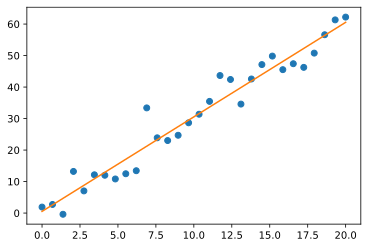

In [71]:
with tf.Session() as sess:
  sess.run(init)
  # number of procedure will be decided by epoch
  for epoch in range(epochs):
    for x, y in zip(train_x , train_y):
      sess.run(optimizer , feed_dict={X:x , Y:y})
      
      # let us see output
    if (epoch%20) == 0:
      c = sess.run(cost, feed_dict={X:train_x ,Y:train_y})
      W = sess.run(w)
      B = sess.run(b)
      print("cost:{} w:{} b:{}".format(c ,W, B))
      # we see that cost minimizing
      #print(f'epoch:{epoch:04d} c={cost:.4f} W={W:.4f} B={B:.4f}')
  weight = sess.run(w)
  bias = sess.run(b)   
  plt.plot(train_x , train_y ,'o')
  plt.plot(train_x ,weight * train_x + bias)
  plt.show()


**this will be predicted result** 
